# Evaluation
CMP5101 notes (Tevfik Aytekin)

Below are some commonly used metrics for evaluating the performance of regression and classification methods. Note that there are many other metrics which can be used for evaluation. There is no best metric, instead every metric some set of properties and should be used according to the specific needs of the user.

## Metrics for Regression

#### Mean Absolute Error (MAE)

$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

Properties:
- Can be used for regression problems

#### Mean Squared Error (MSE)

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Properties:
- Can be used for regression problems
- Penalizes large errors more compared to MAE. So, more sensitive to outliers than MAE

#### Root Mean Squared Error (RMSE)

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

Properties:
- Similar to MSE but scales the error back to the scale of the target values.
- Since square root is a nondecreasing function, if a result $a$ is better than $b$ with respect to MSE than $a$ is also better than $b$ with respect to RMSE.

#### The Coefficient of Determination, r-squared ($r^2$)

$$ r^2 = 1 - \frac{MSE_{model}}{MSE_{mean}}$$ 

where $MSE_{mean}$ is the MSE of the baseline model which always predicts the mean of the target values in the training set.

Properties:
- Evaluates the performance of your model with respect to a baseline.

#### Mean Percentage Absolute Error (MAPE)

$$MAE = \frac{1}{n}\sum_{i=1}^{n}\left|\frac{y_i - \hat{y}_i}{y_i}\right|*100$$

Properties:
- Gives a scaled error value independent of the magnitude of the target values.
- Problematic when the target value is 0 or very close to 0.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
train = pd.read_csv("house-prices/train.csv")
X = train[['GrLivArea']]
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model_slr = linear_model.LinearRegression()
model = model_slr.fit(X_train, y_train)
train_predictions = model_slr.predict(X_train)
test_predictions = model_slr.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test MSE:", mean_squared_error(y_test, test_predictions))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, test_predictions)))
print("Test r-squared:", r2_score(y_test, test_predictions))
print("Test MAPE:",np.mean(np.abs((y_test - test_predictions) / y_test)) * 100);

Test MAE: 34316.54120679003
Test MSE: 2284656934.3953857
Test RMSE: 47798.08504945973
Test r-squared: 0.4568361023862859
Test MAPE: 22.622995505353042


## Metrics for Classification

#### Confusion Matrix
<img src="images/confusion_matrix.png" style="max-width:100%; width: 40%">

- TP: the number of cases where both actual and predicted values are positive
- FN: the number of cases where actual value is positive but predicted value is negative
- FP: the number of cases where actual value is negative but predicted value is positive
- TN: the number of cases where both actual and predicted values are negative


#### Accuracy
$$ Accuracy = \frac{TP+TN}{TP+FN+FP+TN}$$

#### Precision
$$ Precision = \frac{TP}{TP+FP}$$

#### Recall
$$ Recall = \frac{TP}{TP+FN}$$

#### F-measure
$$ F_1 = \frac{2*Precision*Recall}{Precision+Recall}$$

#### Kappa

$$ \kappa = \frac{p_a-p_e}{1-p_e}$$

where $p_a$ is the accuracy of the model and $p_e$ is the expected accuracy of pure chance.

#### ROC Curve and AUC

ROC Curves can be used to evaluate the performance of a classifier which produces a probabilistic output for class membership. When the classifier produces a probabilistic output, you have the chance to put a threshold to distinguish betweeb positive and negative classes. ROC curve is generated by moving the threshold to different values and find the true positive rate (tpr) and false positive rate (fpr) at these thresholds. Area under the curve (AUC) is the total area under the roc curve. Classifiers who AUC is larger are better classifiers.

$$
True Positive Rate\:(TPR) = Recall = \frac{TP}{TP+FN}
$$

$$
False Positive Rate\:(FPR) = \frac{FP}{FP+TN}
$$


In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','diagnosis']
heart = pd.read_csv(url, names=names, na_values=["?"])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split  

X = heart.iloc[:,0:12]
y = heart.iloc[:,13]
y = y.replace([1,2,3,4],[1,1,1,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
 
clf1 = KNeighborsClassifier(n_neighbors=10)
clf2 = DecisionTreeClassifier(min_samples_split=20)
clf1.fit(X_train, y_train);
clf2.fit(X_train, y_train);
y_pred1 = clf1.predict_proba(X_test)  
y_pred2 = clf2.predict_proba(X_test)  

In [89]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1[:, 1],drop_intermediate=False)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2[:, 1],drop_intermediate=False)

Text(0,0.5,'True Positive Rate')

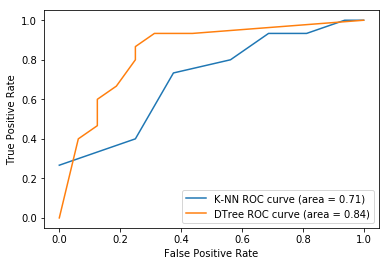

In [90]:
import matplotlib.pyplot as plt

# This is the ROC curve
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)

plt.plot(fpr1,tpr1,label='K-NN ROC curve (area = %0.2f)' % auc1);
plt.plot(fpr2,tpr2,label='DTree ROC curve (area = %0.2f)' % auc2);
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [113]:
# Class values and sorted predicted class probabilities, thresholds, tpr, fpr
pd.DataFrame([y_test.values, 
                  y_pred1[:, 1]],
                 index = ['Class','Prob']).sort_values(axis=1, by='Prob')

,10,3,11,12,8,14,20,19,18,25,23,21,7,17,15,24,13,29,6,28,16,9,27,22,2,1,26,0,4,5,30
Class,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Prob,0.0,0.1,0.1,0.1,0.2,0.2,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.6,0.6,0.6,0.6,0.6,0.6,0.8,0.8,0.8,0.8


In [112]:
# thresholds, tpr, fpr
pd.DataFrame([thresholds1[::-1], 
                  tpr1,
                   fpr1],
                 index = ['Thresholds','TPR', 'FPR'])

,0,1,2,3,4,5,6,7
Thresholds,0.000000,0.10,0.200000,0.3000,0.400000,0.500000,0.6000,0.8
TPR,0.266667,0.40,0.733333,0.8000,0.933333,0.933333,1.0000,1.0
FPR,0.000000,0.25,0.375000,0.5625,0.687500,0.812500,0.9375,1.0
